# Лабараторная работа №1

# Выполнила студентка группы 15-АС Целищева Анна

# Вариант 2

In [75]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('flights.csv', nrows = 80000)

In [76]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
79995,2015,1,6,2,US,649,N582UW,LAX,PHX,625,...,847.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
79996,2015,1,6,2,US,1835,N105UW,PBI,PHL,625,...,859.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
79997,2015,1,6,2,OO,5628,N754SK,RNO,SFO,625,...,738.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
79998,2015,1,6,2,WN,523,N552WN,CMH,BWI,625,...,845.0,55.0,0,0,NaN,35.0,0.0,0.0,0.0,20.0
79999,2015,1,6,2,WN,529,N8633A,DAL,DCA,625,...,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
YEAR                   80000 non-null int64
MONTH                  80000 non-null int64
DAY                    80000 non-null int64
DAY_OF_WEEK            80000 non-null int64
AIRLINE                80000 non-null object
FLIGHT_NUMBER          80000 non-null int64
TAIL_NUMBER            79889 non-null object
ORIGIN_AIRPORT         80000 non-null object
DESTINATION_AIRPORT    80000 non-null object
SCHEDULED_DEPARTURE    80000 non-null int64
DEPARTURE_TIME         78096 non-null float64
DEPARTURE_DELAY        78096 non-null float64
TAXI_OUT               78038 non-null float64
WHEELS_OFF             78038 non-null float64
SCHEDULED_TIME         80000 non-null int64
ELAPSED_TIME           77848 non-null float64
AIR_TIME               77848 non-null float64
DISTANCE               80000 non-null int64
WHEELS_ON              77984 non-null float64
TAXI_IN                77984 non-null

In [10]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,80000.0,80000.0,80000.000000,80000.000000,80000.000000,80000.000000,78096.000000,78096.000000,78038.000000,78038.000000,...,80000.000000,77984.000000,77848.000000,80000.000000,80000.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,2015.0,1.0,3.096650,4.563388,2245.166837,1331.931950,1350.417704,20.128214,16.804403,1371.063841,...,1500.643475,1471.817270,18.470083,0.002213,0.024688,13.269717,0.073621,18.081472,26.060381,2.330026
std,0.0,0.0,1.427913,2.100860,1820.220197,485.161833,506.917513,46.017825,9.913498,508.488537,...,505.396236,548.295212,48.841273,0.046985,0.155172,25.231664,1.751028,44.378192,42.047854,15.673120
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,1.000000,1.000000,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,2.000000,4.000000,768.000000,923.000000,929.000000,-3.000000,11.000000,943.000000,...,1115.000000,1057.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,3.000000,5.000000,1695.000000,1328.000000,1342.000000,3.000000,14.000000,1355.000000,...,1523.000000,1515.000000,5.000000,0.000000,0.000000,4.000000,0.000000,5.000000,11.000000,0.000000
75%,2015.0,1.0,4.000000,6.000000,3365.000000,1732.000000,1753.000000,25.000000,19.000000,1806.000000,...,1921.000000,1923.000000,27.000000,0.000000,0.000000,18.000000,0.000000,19.000000,35.000000,0.000000
max,2015.0,1.0,6.000000,7.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1384.000000,1.000000,1.000000,590.000000,107.000000,1380.000000,891.000000,456.000000


In [11]:
df.dropna()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [12]:
df.drop_duplicates()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape


(80000, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 31 columns):
YEAR                   40000 non-null int64
MONTH                  40000 non-null int64
DAY                    40000 non-null int64
DAY_OF_WEEK            40000 non-null int64
AIRLINE                40000 non-null object
FLIGHT_NUMBER          40000 non-null int64
TAIL_NUMBER            39956 non-null object
ORIGIN_AIRPORT         40000 non-null object
DESTINATION_AIRPORT    40000 non-null object
SCHEDULED_DEPARTURE    40000 non-null int64
DEPARTURE_TIME         39098 non-null float64
DEPARTURE_DELAY        39098 non-null float64
TAXI_OUT               39084 non-null float64
WHEELS_OFF             39084 non-null float64
SCHEDULED_TIME         40000 non-null int64
ELAPSED_TIME           38995 non-null float64
AIR_TIME               38995 non-null float64
DISTANCE               40000 non-null int64
WHEELS_ON              39060 non-null float64
TAXI_IN                39060 non-null

# 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [16]:
df1=df.copy()

In [17]:
# 4
print('Выбрана авиакомпания AS:')
print('количество рейсов: ' + str(len(df1[(df1['AIRLINE'] == 'AS')])))
print('количество отмененных рейсов: ' + str(len(df1[(df1['CANCELLED'] == 1) & (df1['AIRLINE'] == 'AS')])))
print('количество перенаправленных рейсов: ' + str(len(df1[(df1['DIVERTED'] == 1) & (df1['AIRLINE'] == 'AS')])))
print('')
print('Выбрана авиакомпания AA:')
print('количество рейсов: ' + str(len(df1[(df1['AIRLINE'] == 'AA')])))
print('количество отмененных рейсов: ' + str(len(df1[(df1['CANCELLED'] == 1) & (df1['AIRLINE'] == 'AA')])))
print('количество перенаправленных рейсов: ' + str(len(df1[(df1['DIVERTED'] == 1) & (df1['AIRLINE'] == 'AA')])))
print('')
print('Выбрана авиакомпания US:')
print('количество рейсов: ' + str(len(df1[(df1['AIRLINE'] == 'US')])))
print('количество отмененных рейсов: ' + str(len(df1[(df1['CANCELLED'] == 1) & (df1['AIRLINE'] == 'Us')])))
print('количество перенаправленных рейсов: ' + str(len(df1[(df1['DIVERTED'] == 1) & (df1['AIRLINE'] == 'US')])))

Выбрана авиакомпания AS:
количество рейсов: 2284
количество отмененных рейсов: 4
количество перенаправленных рейсов: 2

Выбрана авиакомпания AA:
количество рейсов: 7613
количество отмененных рейсов: 234
количество перенаправленных рейсов: 7

Выбрана авиакомпания US:
количество рейсов: 5619
количество отмененных рейсов: 0
количество перенаправленных рейсов: 10


# 1.Подсчитайте количество отменённых рейсов.

In [20]:
# 1
df2 = df.copy()
print(len(df2[df2['CANCELLED'] ==1]))

1975


# 2.Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [19]:
# 2
df1 = df.groupby('ORIGIN_AIRPORT')['CANCELLED'].sum().sort_values()
print("Наиболее часто рейсы отменяют в аэропорте " + str(df1.index[len(df1)-1]))

Наиболее часто рейсы отменяют в аэропорте DFW


# 3.Определите корреляцию между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом.

In [57]:
print(df[['CANCELLED','DAY_OF_WEEK']].corr(method='pearson')) 
print(df[['CANCELLED','DAY_OF_WEEK']].corr(method='spearman')) 
print('') 
print(df[['CANCELLED','MONTH']].corr(method='pearson')) 
print(df[['CANCELLED','MONTH']].corr(method='spearman')) 
print('') 

from sklearn.preprocessing import LabelEncoder 
lb_make = LabelEncoder() 
df['AIRLINE'] = lb_make.fit_transform(df['AIRLINE']) 
df['ORIGIN_AIRPORT'] = lb_make.fit_transform(df['ORIGIN_AIRPORT']) 

print(df[['CANCELLED','AIRLINE']].corr(method='pearson')) 
print(df[['CANCELLED','AIRLINE']].corr(method='spearman')) 
print('') 
print(df[['CANCELLED','ORIGIN_AIRPORT']].corr(method='pearson')) 
print(df[['CANCELLED','ORIGIN_AIRPORT']].corr(method='spearman'))


             CANCELLED  DAY_OF_WEEK
CANCELLED     1.000000    -0.011722
DAY_OF_WEEK  -0.011722     1.000000
             CANCELLED  DAY_OF_WEEK
CANCELLED      1.00000     -0.01149
DAY_OF_WEEK   -0.01149      1.00000

           CANCELLED  MONTH
CANCELLED        1.0    NaN
MONTH            NaN    NaN
           CANCELLED  MONTH
CANCELLED        1.0    NaN
MONTH            NaN    NaN

           CANCELLED   AIRLINE
CANCELLED   1.000000 -0.027894
AIRLINE    -0.027894  1.000000
           CANCELLED   AIRLINE
CANCELLED   1.000000 -0.031584
AIRLINE    -0.031584  1.000000

                CANCELLED  ORIGIN_AIRPORT
CANCELLED        1.000000       -0.013493
ORIGIN_AIRPORT  -0.013493        1.000000
                CANCELLED  ORIGIN_AIRPORT
CANCELLED        1.000000       -0.011603
ORIGIN_AIRPORT  -0.011603        1.000000


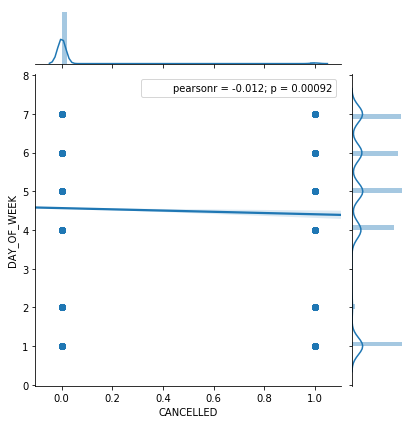

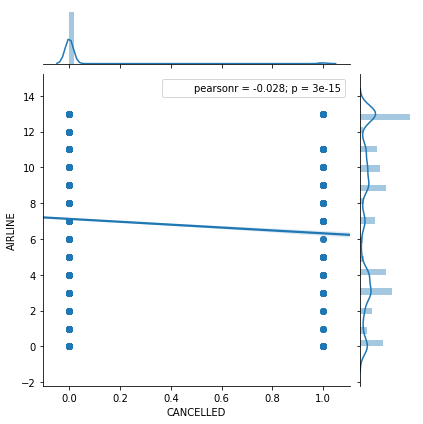

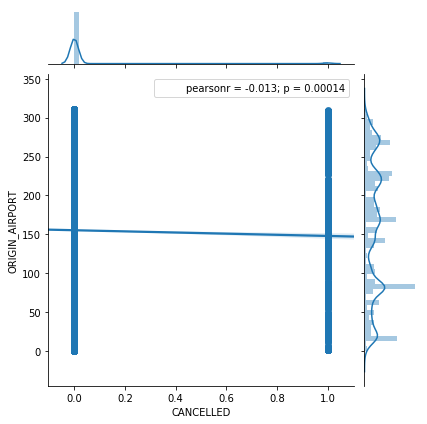

In [58]:
sns.jointplot(x='CANCELLED', y='DAY_OF_WEEK', data=df_new, kind='reg'); 
plt.xlabel("CANCELLED"); 
plt.ylabel("DAY_OF_WEEK"); 
plt.show();
df_new['AIRLINE'] = lb_make.fit_transform(df_new['AIRLINE'])
sns.jointplot(x='CANCELLED', y='AIRLINE', data=df_new, kind='reg'); 
plt.xlabel("CANCELLED"); 
plt.ylabel("AIRLINE"); 
plt.show();
df_new['ORIGIN_AIRPORT'] = lb_make.fit_transform(df_new['ORIGIN_AIRPORT'])
sns.jointplot(x='CANCELLED', y='ORIGIN_AIRPORT', data=df_new, kind='reg'); 
plt.xlabel("CANCELLED"); 
plt.ylabel("ORIGIN_AIRPORT"); 
plt.show();


# 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для  авиакомпаний.

In [71]:

# 5

print('Рейс №   Скорость полета для каждого рейса')

df['time'] = df['ARRIVAL_TIME'] - df['DEPARTURE_TIME'] 
list = []
for i in df['time']:
    if i < 0:
        i = i*(-1)
        df['speed'] = df['DISTANCE'] / i
print(df['speed']) 
df2 = df[(df.AIRLINE == 'AA') | (df.AIRLINE == 'AS') | (df.AIRLINE == 'US')][:]
print("Средняя скорость")
print(df2['speed'].mean())
print('')

Рейс №   Скорость полета для каждого рейса
0        362.00
1        582.50
2        574.00
3        585.50
4        362.00
5        397.25
6        324.75
7        531.25
8        366.00
9        436.75
10       299.75
11       543.50
12       383.75
13       397.50
14       349.75
15       362.00
16       362.00
17       408.75
18       385.50
19       356.50
20       284.75
21       681.00
22       263.75
23       585.50
24       324.75
25       344.75
26       383.25
27       371.75
28       479.00
29       427.25
          ...  
79970    191.75
79971    213.00
79972    155.50
79973    135.25
79974    100.50
79975    276.75
79976     27.25
79977    148.50
79978     18.25
79979    216.75
79980    314.50
79981    122.25
79982    125.00
79983     87.75
79984    292.75
79985    131.00
79986     59.00
79987     61.75
79988    397.25
79989    160.25
79990    125.25
79991     77.00
79992    137.50
79993    157.75
79994    600.50
79995     92.50
79996    237.75
79997     48.00
79998     84.

# 6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов)

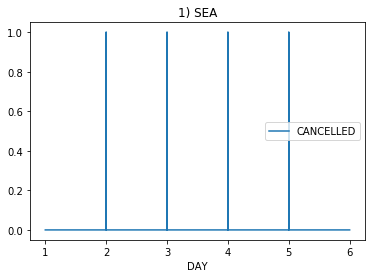

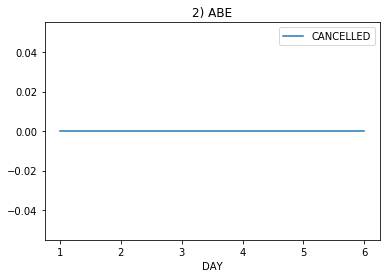

In [77]:
# 6
df_airoports = df[(df.ORIGIN_AIRPORT == 'ABE') | (df.ORIGIN_AIRPORT == 'SEA')][:]
arr = tuple(df_airoports['ORIGIN_AIRPORT'].unique())
for i in range(0,len(arr)):
    df = df_airoports[['ORIGIN_AIRPORT','DAY','CANCELLED']]
    df = df[df['ORIGIN_AIRPORT'] == arr[i]]  
    df.plot(x='DAY', y='CANCELLED', title=str(i+1) + ") " + str(arr[i]))
    plt.show()

# 7..Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.

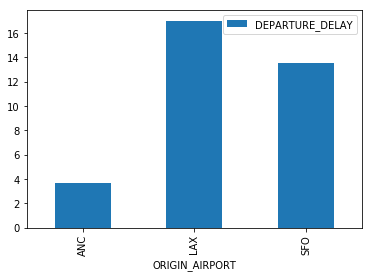

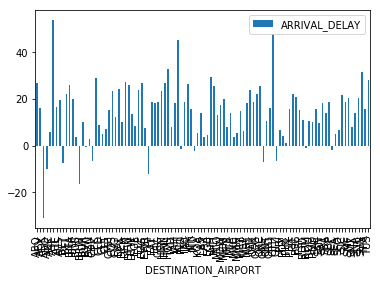

In [28]:
# 7
df_new=pd.read_csv('flights.csv', nrows = 80000)
df_new.dropna()
df_airoports3 = df_new[(df_new.ORIGIN_AIRPORT == 'ANC') | (df_new.ORIGIN_AIRPORT == 'LAX') | (df_new.ORIGIN_AIRPORT == 'SFO')][:]
df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','DEPARTURE_DELAY'].mean().dropna().plot(kind='bar') 
df_airoports3.groupby('DESTINATION_AIRPORT')['DESTINATION_AIRPORT','ARRIVAL_DELAY'].mean().dropna().plot(kind='bar') 
plt.show()

# 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.

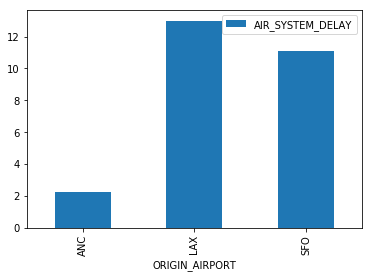

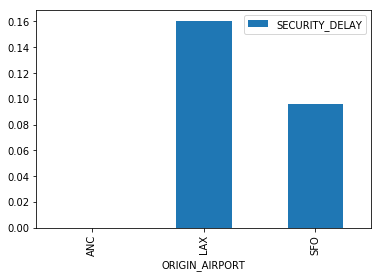

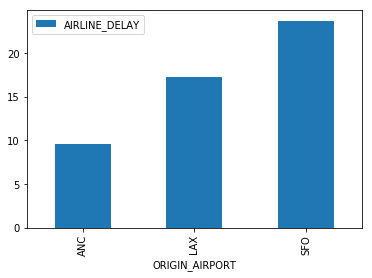

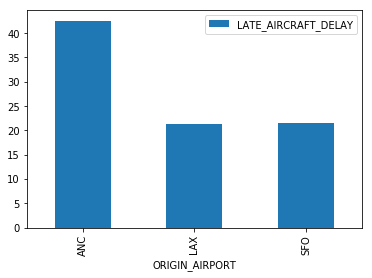

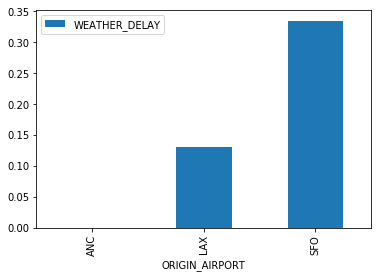

In [31]:
# 8
df_air = df_airoports3['AIR_SYSTEM_DELAY']
df_sec = df_airoports3['SECURITY_DELAY']
df_airl = df_airoports3['AIRLINE_DELAY']
df_late = df_airoports3['LATE_AIRCRAFT_DELAY']
df_weat = df_airoports3['WEATHER_DELAY']            

df_air = df_air.dropna().reset_index(drop=True)
df_sec = df_sec.dropna().reset_index(drop=True)
df_airl = df_airl.dropna().reset_index(drop=True)
df_late = df_late.dropna().reset_index(drop=True)
df_weat = df_weat.dropna().reset_index(drop=True)


df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','AIR_SYSTEM_DELAY'].mean().dropna().plot(kind='bar') 
df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','SECURITY_DELAY'].mean().dropna().plot(kind='bar')
df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','AIRLINE_DELAY'].mean().dropna().plot(kind='bar')
df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','LATE_AIRCRAFT_DELAY'].mean().dropna().plot(kind='bar')    
df_airoports3.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','WEATHER_DELAY'].mean().dropna().plot(kind='bar')
plt.legend()
plt.show()

# 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [32]:
# 9
airline_list = df['AIRLINE'].unique()

print('Максимальные задержки рейсов по отправке')
delay_dict = {}
for airline in airline_list:
    delay = len(df[(df['DEPARTURE_DELAY'] == 1) & (df['AIRLINE'] == airline)])
    print('airline', airline, '\t', delay)
    delay_dict[airline] = delay
print(' ')    
print('Максимальные задержки рейсов по прибытию')
delay_dict = {}
for airline in airline_list:
    delay = len(df[(df['ARRIVAL_DELAY'] == 1) & (df['AIRLINE'] == airline)])
    print('airline', airline, '\t', delay)
    delay_dict[airline] = delay
    
df1 = df.groupby('AIRLINE')['ARRIVAL_DELAY'].sum().sort_values()
print("Максимальные задержки рейсов по прибытию у авиакомпании " + str(df1.index[len(df1)-1]))
df1 = df.groupby('AIRLINE')['DEPARTURE_DELAY'].sum().sort_values()
print("Максимальные задержки рейсов по отправке у авиакомпании " + str(df1.index[len(df1)-1]))

Максимальные задержки рейсов по отправке
('airline', 1, '\t', 78)
('airline', 0, '\t', 176)
('airline', 11, '\t', 181)
('airline', 3, '\t', 375)
('airline', 8, '\t', 30)
('airline', 10, '\t', 197)
('airline', 6, '\t', 34)
('airline', 2, '\t', 73)
('airline', 9, '\t', 154)
('airline', 4, '\t', 183)
('airline', 7, '\t', 58)
('airline', 5, '\t', 24)
('airline', 13, '\t', 578)
('airline', 12, '\t', 32)
 
Максимальные задержки рейсов по прибытию
('airline', 1, '\t', 50)
('airline', 0, '\t', 120)
('airline', 11, '\t', 123)
('airline', 3, '\t', 183)
('airline', 8, '\t', 20)
('airline', 10, '\t', 117)
('airline', 6, '\t', 47)
('airline', 2, '\t', 71)
('airline', 9, '\t', 165)
('airline', 4, '\t', 169)
('airline', 7, '\t', 36)
('airline', 5, '\t', 19)
('airline', 13, '\t', 350)
('airline', 12, '\t', 24)
Максимальные задержки рейсов по прибытию у авиакомпании 13
Максимальные задержки рейсов по отправке у авиакомпании 13
